# Project Title: Predictive Trading Strategy Development for VDE ETF Using Machine Learning - Part-1

# By Abhishek Patil

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


# EDA

In [2]:
# Download historical data for SPY
vde = yf.download('VDE', start='2000-01-01', end='2023-12-01')
vde['SMA_5'] = vde['Close'].rolling(window=5).mean()
vde['SMA_21'] = vde['Close'].rolling(window=21).mean()
vde['Daily_Return'] = vde['Close'].pct_change()
vde.dropna(inplace=True)
vde["Move"] = vde["High"] - vde["Low"]
vde["Move_per"] = vde["Move"] / vde["Low"]
vde['Target'] = np.where(vde['Daily_Return'] > 0, 1, 0)

[*********************100%%**********************]  1 of 1 completed


In [3]:
vde.shape

(4807, 12)

In [6]:
vde.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4807 entries, 2004-10-27 to 2023-11-30
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4807 non-null   float64
 1   High          4807 non-null   float64
 2   Low           4807 non-null   float64
 3   Close         4807 non-null   float64
 4   Adj Close     4807 non-null   float64
 5   Volume        4807 non-null   int64  
 6   SMA_5         4807 non-null   float64
 7   SMA_21        4807 non-null   float64
 8   Daily_Return  4807 non-null   float64
 9   Move          4807 non-null   float64
 10  Move_per      4807 non-null   float64
 11  Target        4807 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 488.2 KB


In [5]:
vde.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_21,Daily_Return,Move,Move_per,Target
count,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4.807000e+03,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,92.978373,93.816823,92.003066,92.937381,70.320035,3.842134e+05,92.909511,92.797246,0.000361,1.813757,0.020868,0.515914
std,21.378539,21.418627,21.325136,21.381284,19.761309,5.110231e+05,21.345468,21.240877,0.019334,1.082718,0.014728,0.499799
min,31.809999,33.450001,30.030001,31.290001,26.800179,1.700000e+03,33.176000,37.879524,-0.198254,0.139999,0.002676,0.000000
25%,78.250000,78.849998,77.310001,78.134998,55.840815,9.170000e+04,78.083000,78.150476,-0.008733,1.110001,0.012007,0.000000
50%,93.709999,94.599998,92.860001,93.730003,70.400253,2.038000e+05,93.736000,93.817143,0.000534,1.540009,0.017251,1.000000
75%,108.505001,109.500000,107.415001,108.449997,80.201824,4.540500e+05,108.540001,108.567143,0.010084,2.209999,0.025129,1.000000
max,145.600006,145.970001,145.250000,145.600006,128.494217,5.786700e+06,144.132001,143.458572,0.170972,11.910004,0.202137,1.000000


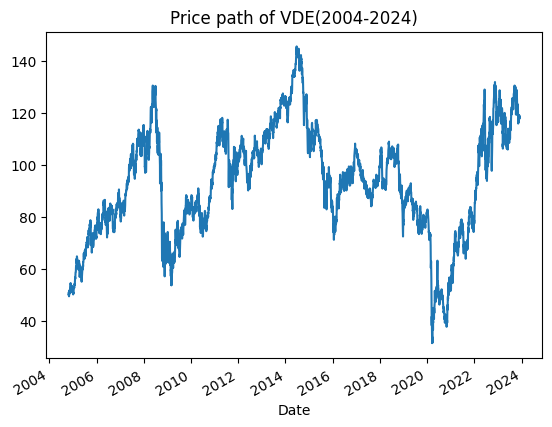

In [7]:
# Plotting the price path of SPY
vde["Close"].plot()
plt.title(f'Price path of VDE(2004-2024)')
plt.show()

In [8]:
#Generating the correlation matrix of spy_data
correlation_matrix = vde.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  Open      High       Low     Close  Adj Close    Volume  \
Open          1.000000  0.999220  0.998951  0.998144   0.870616 -0.211363   
High          0.999220  1.000000  0.998726  0.999051   0.873507 -0.203559   
Low           0.998951  0.998726  1.000000  0.999160   0.870727 -0.219264   
Close         0.998144  0.999051  0.999160  1.000000   0.872697 -0.211482   
Adj Close     0.870616  0.873507  0.870727  0.872697   1.000000  0.081570   
Volume       -0.211363 -0.203559 -0.219264 -0.211482   0.081570  1.000000   
SMA_5         0.997751  0.997820  0.996818  0.996790   0.869750 -0.207150   
SMA_21        0.984569  0.985576  0.982327  0.983197   0.857203 -0.197377   
Daily_Return -0.023412 -0.004070  0.003095  0.024109   0.021501 -0.023188   
Move          0.091583  0.111435  0.061152  0.084118   0.130185  0.291750   
Move_per     -0.311159 -0.292831 -0.338083 -0.317066  -0.230308  0.393609   
Target       -0.011181  0.005043  0.010180  0.026313   0

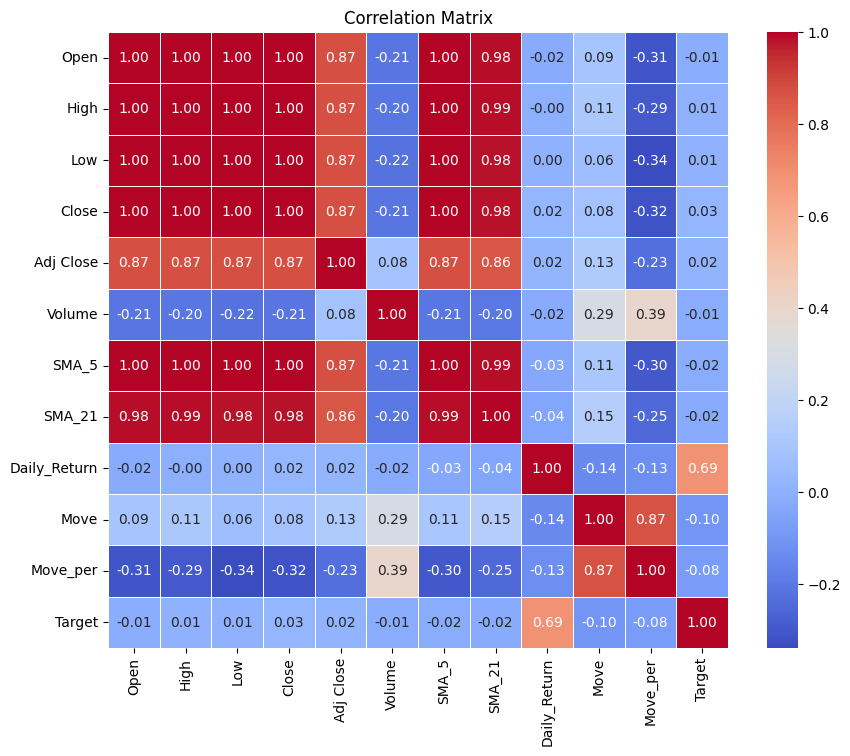

In [9]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# This is to decide which machine learning model to use based on the results of this experiment:

# Testing different Machine Learning model and their predictive power for vde across time frame and the strength of my underlying features.

In [10]:
# Performance Metrics function
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, rmse, r2, mape

[*********************100%%**********************]  1 of 1 completed


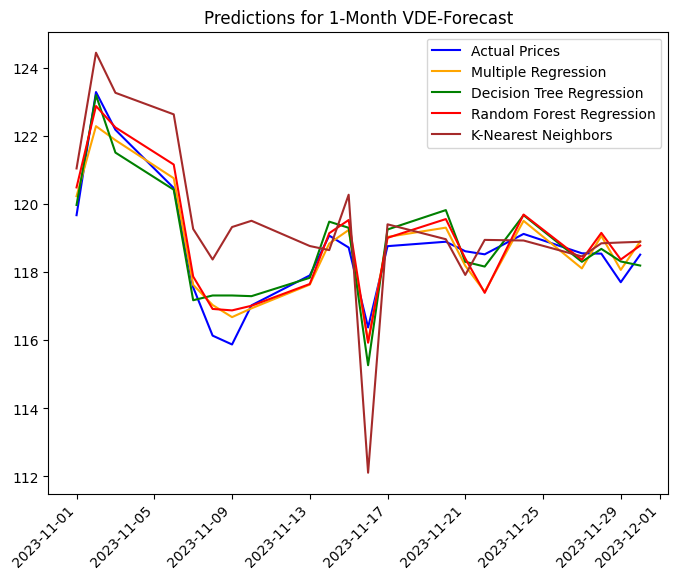


Overall Performance Metrics for 1-Month VDE-Forecast:
                          MAE       MSE      RMSE  R-Squared      MAPE
Multiple Regression  0.464592  0.288573  0.537190   0.904540  0.391393
Decision Tree        0.500478  0.388768  0.623512   0.871396  0.424321
Random Forest        0.487577  0.335080  0.578861   0.889156  0.411822
K-NN                 1.274191  2.830366  1.682369   0.063715  1.080192



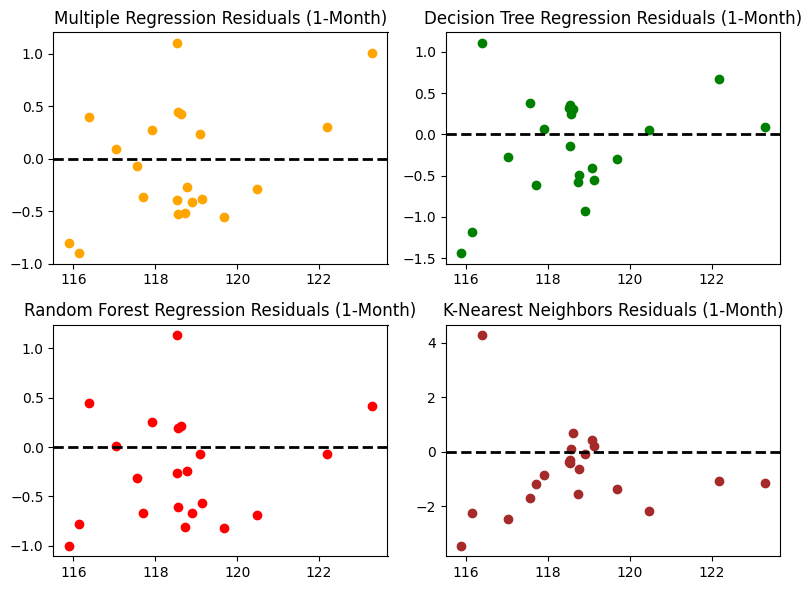


Residual Statistics for 1-Month VDE-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.057679          0.547274
Decision Tree            -0.156666          0.618413
Random Forest            -0.234510          0.542300
K-NN                     -0.733429          1.551474



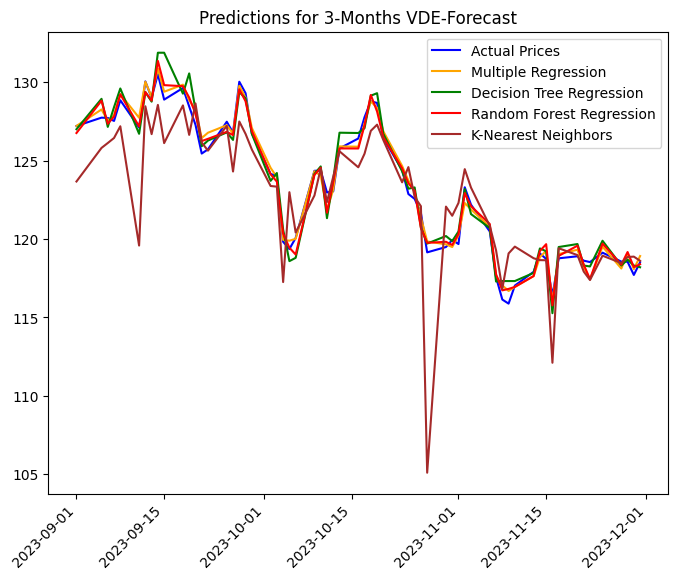


Overall Performance Metrics for 3-Months VDE-Forecast:
                          MAE       MSE      RMSE  R-Squared      MAPE
Multiple Regression  0.400922  0.243617  0.493576   0.987278  0.326958
Decision Tree        0.634128  0.657902  0.811111   0.965644  0.513050
Random Forest        0.471906  0.316244  0.562356   0.983485  0.383386
K-NN                 1.643048  6.786417  2.605075   0.645608  1.333476



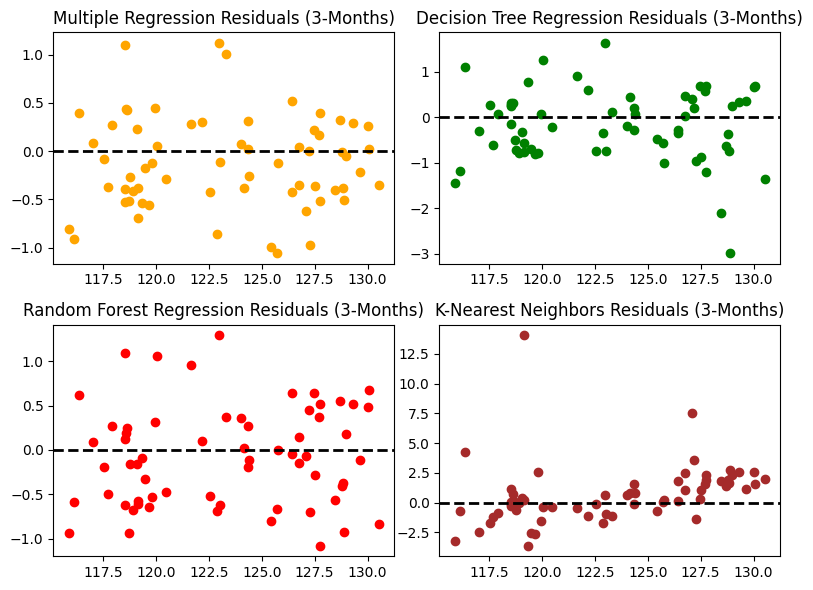


Residual Statistics for 3-Months VDE-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.120882          0.482388
Decision Tree            -0.188730          0.795185
Random Forest            -0.073541          0.562005
K-NN                      0.692572          2.531498



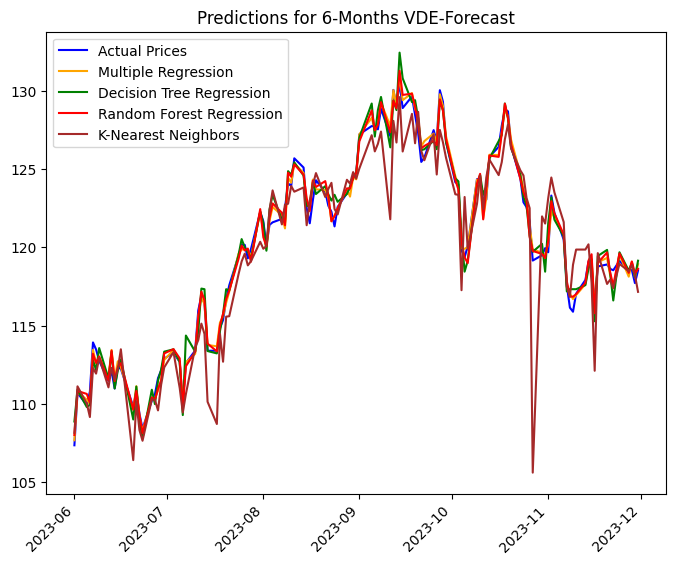


Overall Performance Metrics for 6-Months VDE-Forecast:
                          MAE       MSE      RMSE  R-Squared      MAPE
Multiple Regression  0.394216  0.249849  0.499849   0.992689  0.328387
Decision Tree        0.602913  0.593760  0.770558   0.982625  0.502682
Random Forest        0.449084  0.298228  0.546102   0.991273  0.373150
K-NN                 1.352945  4.025064  2.006256   0.882216  1.126357



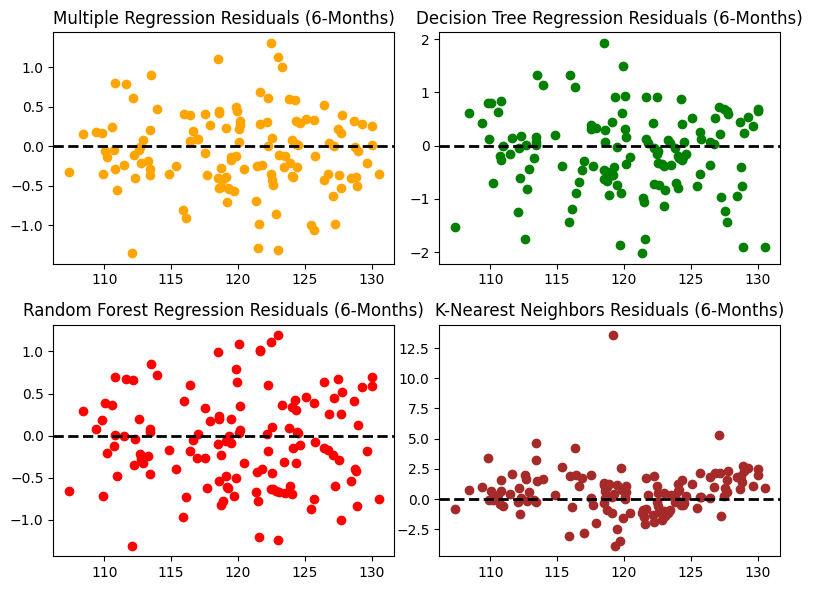


Residual Statistics for 6-Months VDE-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.066967          0.497305
Decision Tree            -0.139921          0.760749
Random Forest            -0.070088          0.543731
K-NN                      0.582362          1.927478



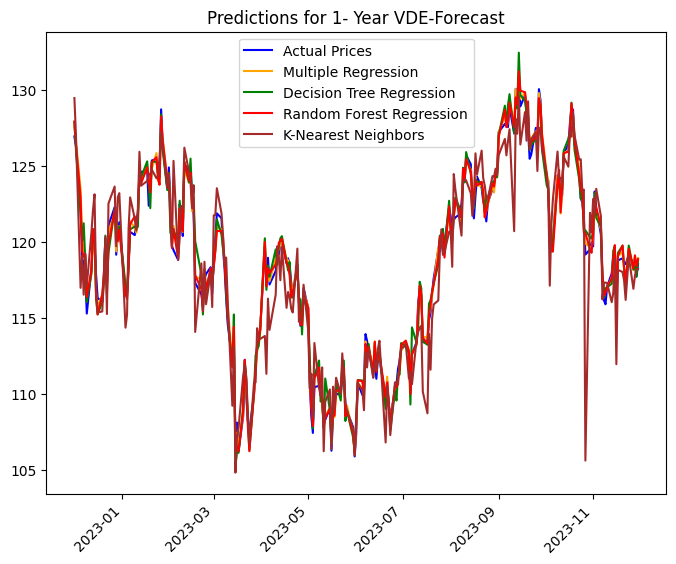


Overall Performance Metrics for 1- Year VDE-Forecast:
                          MAE       MSE      RMSE  R-Squared      MAPE
Multiple Regression  0.437480  0.309554  0.556376   0.991164  0.368915
Decision Tree        0.634980  0.668681  0.817729   0.980913  0.539552
Random Forest        0.483663  0.366948  0.605762   0.989526  0.407780
K-NN                 1.390430  3.782882  1.944963   0.892019  1.170747



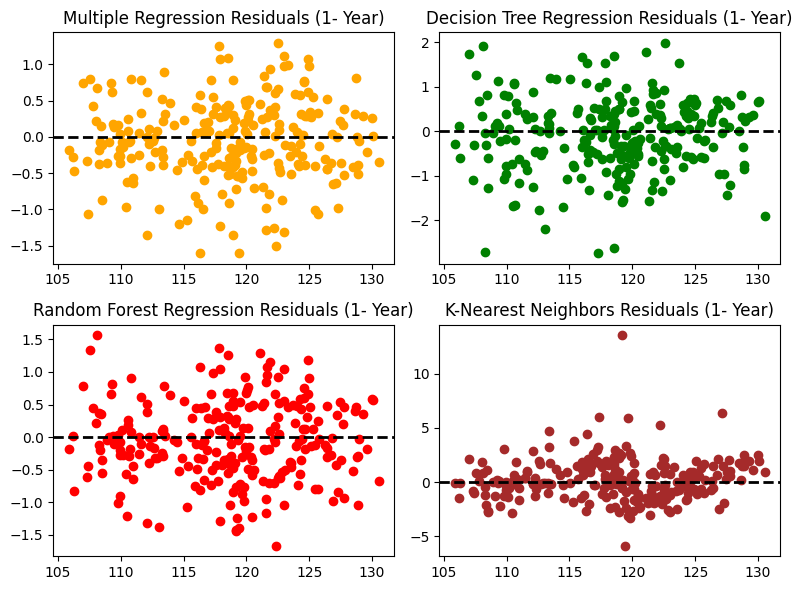


Residual Statistics for 1- Year VDE-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.056535          0.554602
Decision Tree            -0.087171          0.814694
Random Forest            -0.052788          0.604664
K-NN                      0.263307          1.930908



In [11]:
# Download historical data for SPY
vde = yf.download('VDE', start='2000-01-01', end='2023-12-01')
vde['SMA_5'] = vde['Close'].rolling(window=5).mean()
vde['SMA_21'] = vde['Close'].rolling(window=21).mean()
vde['Daily_Return'] = vde['Close'].pct_change()
vde.dropna(inplace=True)
vde["Move"] = vde["High"] - vde["Low"]
vde["Move_per"] = vde["Move"] / vde["Low"]
vde['Target'] = np.where(vde['Daily_Return'] > 0, 1, 0)
vde.tail()
# spy_data.head()

features = ["Open", "High", "Low","Volume","Daily_Return", "Move", "Move_per","SMA_5", "SMA_21"]
X = vde[features]
y = vde['Close']

#List of training end dates
dates = ['2023-11-01', '2023-09-01', '2023-06-01', '2022-12-01']
pred = ['1-Month', '3-Months', '6-Months', '1- Year']
# Create an empty DataFrame to store performance metrics
all_metrics_df = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'])

# Iterate #through each training end date
for train_end_date, i in zip(dates, pred):
    # Train-test split
    X_train = X[X.index < train_end_date]
    y_train = y[y.index < train_end_date]
    X_test = X[X.index >= train_end_date]
    y_test = y[y.index >= train_end_date]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Multiple Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    lr_predictions = lr_model.predict(X_test_scaled)

    # Decision Tree Regression
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_scaled, y_train)
    dt_predictions = dt_model.predict(X_test_scaled)

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_test_scaled)

    # K-Nearest Neighbors Regression
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train_scaled, y_train)
    knn_predictions = knn_model.predict(X_test_scaled)



    # Calculate metrics for each model
    lr_metrics = calculate_metrics(y_test, lr_predictions)
    dt_metrics = calculate_metrics(y_test, dt_predictions)
    rf_metrics = calculate_metrics(y_test, rf_predictions)
    knn_metrics = calculate_metrics(y_test, knn_predictions)


    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, lr_predictions, label='Multiple Regression', color='orange')
    plt.plot(y_test.index, dt_predictions, label='Decision Tree Regression', color='green')
    plt.plot(y_test.index, rf_predictions, label='Random Forest Regression', color='red')
    plt.plot(y_test.index, knn_predictions, label='K-Nearest Neighbors', color='brown')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Predictions for {i} VDE-Forecast')
    plt.legend()

    plt.show()

    # Compare Performance Metrics
    models = ['Multiple Regression', 'Decision Tree', 'Random Forest','K-NN']
    metrics_df = pd.DataFrame([lr_metrics, dt_metrics, rf_metrics,knn_metrics],
                          columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'], index=models)

    # Display overall performance metrics
    print(f"\nOverall Performance Metrics for {i} VDE-Forecast:")
    print(f"{metrics_df}\n")


##############################################################################################################################################################################################################################################
### Residual Analysis

    # Calculate residuals for each model
    lr_residuals = y_test - lr_predictions
    dt_residuals = y_test - dt_predictions
    rf_residuals = y_test - rf_predictions
    knn_residuals = y_test - knn_predictions


    # Plot Residuals
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 2, 1)
    plt.scatter(y_test, lr_residuals, color='orange')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Multiple Regression Residuals ({i})')

    plt.subplot(2, 2, 2)
    plt.scatter(y_test, dt_residuals, color='green')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Decision Tree Regression Residuals ({i})')

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, rf_residuals, color='red')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Random Forest Regression Residuals ({i})')

    plt.subplot(2, 2, 4)
    plt.scatter(y_test, knn_residuals, color='brown')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'K-Nearest Neighbors Residuals ({i})')



    plt.tight_layout()
    plt.show()

    # Display Residual Statistics
    residual_stats = pd.DataFrame({
    'Mean Residual': [lr_residuals.mean(), dt_residuals.mean(), rf_residuals.mean(), knn_residuals.mean()],
    'Std Dev Residual': [lr_residuals.std(), dt_residuals.std(), rf_residuals.std(), knn_residuals.std()]
    }, index=models)

    print(f"\nResidual Statistics for {i} VDE-Forecast:")
    print(f"{residual_stats}\n")

# Cross Validating the Best Performimg models Multiple Regression and Random Forest

In [12]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# Define the number of splits for TimeSeriesSplit
n_splits = 10  # You can adjust this based on your preference

# Create TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=n_splits)

train_end_date = '2023-11-01'
# Train-test split
X_train = X[X.index < train_end_date]
y_train = y[y.index < train_end_date]
X_test = X[X.index >= train_end_date]
y_test = y[y.index >= train_end_date]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create empty DataFrames to store performance metrics for each fold
all_metrics_df_fold = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'])

# Perform cross-validation
for train_index, test_index in tscv.split(X_train_scaled):
    X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the model on the training data
    lr_model = LinearRegression()
    lr_model.fit(X_train_cv, y_train_cv)

    # Make predictions on the test data
    lr_predictions_cv = lr_model.predict(X_test_cv)

    # Calculate metrics for each fold
    lr_metrics_cv = calculate_metrics(y_test_cv, lr_predictions_cv)
    # Append metrics for this fold to the DataFrame
    all_metrics_df_fold = all_metrics_df_fold.append(pd.Series(lr_metrics_cv, index=all_metrics_df_fold.columns), ignore_index=True)

# Calculate average metrics across all folds
avg_metrics_cv = all_metrics_df_fold.mean()

# Display overall performance metrics for this training end date
print(f"\nOverall Cross-Validated Performance Metrics for Multiple Linear Regression Model VDE-Forecast:")
print(f"{avg_metrics_cv}\n")



Overall Cross-Validated Performance Metrics for Multiple Linear Regression Model VDE-Forecast:
MAE          0.349411
MSE          0.238329
RMSE         0.474046
R-Squared    0.998008
MAPE         0.401087
dtype: float64



<ipython-input-12-89f15a40e795>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df_fold = all_metrics_df_fold.append(pd.Series(lr_metrics_cv, index=all_metrics_df_fold.columns), ignore_index=True)
<ipython-input-12-89f15a40e795>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df_fold = all_metrics_df_fold.append(pd.Series(lr_metrics_cv, index=all_metrics_df_fold.columns), ignore_index=True)
<ipython-input-12-89f15a40e795>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df_fold = all_metrics_df_fold.append(pd.Series(lr_metrics_cv, index=all_metrics_df_fold.columns), ignore_index=True)
<ipython-input-12-89f15a40e795>:40: FutureWarning: The frame.append method is deprecated and will be

In [13]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# Define the number of splits for TimeSeriesSplit
n_splits = 10  # You can adjust this based on your preference

# Create TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=n_splits)

train_end_date = '2023-11-01'
# Train-test split
X_train = X[X.index < train_end_date]
y_train = y[y.index < train_end_date]
X_test = X[X.index >= train_end_date]
y_test = y[y.index >= train_end_date]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create empty DataFrames to store performance metrics for each fold
all_metrics_df_fold = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'])

# Perform cross-validation
for train_index, test_index in tscv.split(X_train_scaled):
    X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_cv, y_train_cv)
    rf_predictions_cv = rf_model.predict(X_test_cv)

    # Calculate metrics for each fold
    rf_metrics_cv = calculate_metrics(y_test_cv, rf_predictions_cv)

    # Append metrics for this fold to the DataFrame
    all_metrics_df_fold = all_metrics_df_fold.append(pd.Series(lr_metrics_cv, index=all_metrics_df_fold.columns), ignore_index=True)

# Calculate average metrics across all folds
avg_metrics_cv = all_metrics_df_fold.mean()

# Display overall performance metrics for this training end date
print(f"\nOverall Cross-Validated Performance Metrics for Random Forest Model VDE Forecast:")
print(f"{avg_metrics_cv}\n")

<ipython-input-13-30fa4dc17fd2>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df_fold = all_metrics_df_fold.append(pd.Series(lr_metrics_cv, index=all_metrics_df_fold.columns), ignore_index=True)
<ipython-input-13-30fa4dc17fd2>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df_fold = all_metrics_df_fold.append(pd.Series(lr_metrics_cv, index=all_metrics_df_fold.columns), ignore_index=True)
<ipython-input-13-30fa4dc17fd2>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df_fold = all_metrics_df_fold.append(pd.Series(lr_metrics_cv, index=all_metrics_df_fold.columns), ignore_index=True)
<ipython-input-13-30fa4dc17fd2>:39: FutureWarning: The frame.append method is deprecated and will be


Overall Cross-Validated Performance Metrics for Random Forest Model VDE Forecast:
MAE          0.510490
MSE          0.424922
RMSE         0.651860
R-Squared    0.994892
MAPE         0.451880
dtype: float64



<ipython-input-13-30fa4dc17fd2>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df_fold = all_metrics_df_fold.append(pd.Series(lr_metrics_cv, index=all_metrics_df_fold.columns), ignore_index=True)


# The results indicate that both Multiple Regression and Random Forest models perform exceptionally well across various time-based characteristics. We will utilize the identical model to forecast the future prices for our trading approach.
